In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn import linear_model
import math
import matplotlib as mpl

In [2]:
# Reading csv file of India Covid 19
df=pd.read_csv(r"E:\THIRD YEAR\5TH SEM\Biomedical Instrumentation\Project\India_COVID19.csv")
df.head()

,Date,Day,Month,Year,Cases,Deaths,Country,GeoId,Country Code,Population Data 2019,Continent,Cumulative number for 14 days of COVID-19 cases per 100000,Day Number
0,12/31/2019,31,12,2019,0,0,India,IN,IND,1366417756,Asia,NaN,1
1,1/1/2020,1,1,2020,0,0,India,IN,IND,1366417756,Asia,NaN,2
2,1/2/2020,2,1,2020,0,0,India,IN,IND,1366417756,Asia,NaN,3
3,1/3/2020,3,1,2020,0,0,India,IN,IND,1366417756,Asia,NaN,4
4,1/4/2020,4,1,2020,0,0,India,IN,IND,1366417756,Asia,NaN,5


In [3]:
feature_cols=['Cases']

In [4]:
x=df[feature_cols]

In [5]:
x

,Cases
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
y=df['Deaths']
y

0        0
1        0
2        0
3        0
4        0
      ... 
193    551
194    500
195    553
196    582
197    606
Name: Deaths, Length: 198, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train,y_test=train_test_split(x,y,random_state=1)

In [9]:
print(x_train.shape)

(148, 1)


In [10]:
print(y_train.shape)

(148,)


In [11]:
print(x_test.shape)

(50, 1)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# Linear Regression using one variable
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [14]:
# y=mx+c, find c
print(linreg.intercept_)

15.52531539452788


In [15]:
# Find m
print(linreg.coef_)

[0.02038722]


In [16]:
y_new=-15.52531539+0.02038722*x

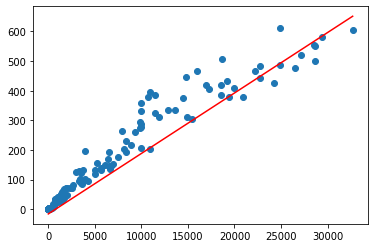

In [17]:
plt.scatter(x,y)
plt.plot(x,y_new,color='red')
plt.show()

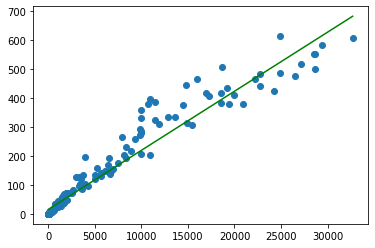

In [18]:
y_new1=linreg.predict(x)
plt.scatter(x,y)
plt.plot(x,y_new1,color='green')
plt.show()

In [19]:
# Predicting the number of deceased
linreg.predict([[2278782]])

array([46473.56501863])

In [20]:
# Linear Regression using multiple variables
df2=pd.read_csv(r"E:\THIRD YEAR\5TH SEM\Biomedical Instrumentation\Project\India_COVID19.csv")

# Filling the empty deaths with median
median_deaths=math.floor(df2.Deaths.median())
df2.Deaths=df2.Deaths.fillna(median_deaths)
# Filling the empty cases with median
median_cases=math.floor(df2.Cases.median())
df2.Cases=df2.Cases.fillna(median_cases)

In [21]:
x1=df2['Cases']
x2=df2['Day Number']
y1=df2['Deaths']
reg=linear_model.LinearRegression()
reg.fit(df2[['Cases','Day Number']],df2.Deaths)

LinearRegression()

In [22]:
reg.coef_

array([0.01786483, 0.52628982])

In [23]:
reg.intercept_

-23.04163045105608

In [27]:
reg.predict([[2200000,250]])

array([39411.1614305])

In [25]:
# Make an Axes3D
from mpl_toolkits.mplot3d import Axes3D

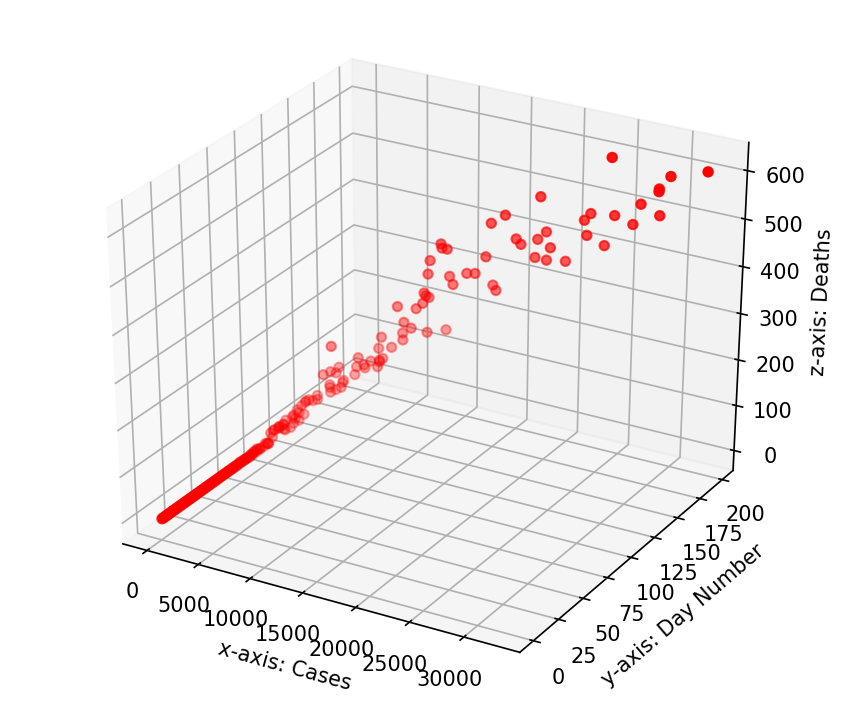

In [26]:
plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['figure.dpi']=150
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x1,x2,y1,c='r',marker='o')
ax.set_xlabel('x-axis: Cases')
ax.set_ylabel('y-axis: Day Number')
ax.set_zlabel('z-axis: Deaths')
#y_new2=reg.predict([[15000,100]])
#plt.plot(x1,x2,y_new2,color='green')
plt.show()